# **Third Scenario: Encrypted-Traffic-Classification-with-Deep-Learning.**

**SVM**

In [215]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [216]:
# Read data from URL
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath, names=names, low_memory=False, sep=',')
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [217]:
# Encoding categorical variables
columnas_codificar = ['srcip', 'dstip', 'dsport', 'proto', 'state', 'dur', 'service', 'Sload', 'Dload', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'ct_ftp_cmd', 'attack_cat']
for col in columnas_codificar:
    le = LabelEncoder()
    columna_codificada = le.fit_transform(dataframe[col])
    dataframe[col] = columna_codificada

X = dataframe.iloc[:, :-1].values
scaler = StandardScaler()
x_normalised = scaler.fit_transform(X)
y = dataframe['label']

In [218]:
# Train the SVM model with the scaled data and the complete training set.
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x_normalised)

clf = SVC(kernel='linear', C=0.001, random_state=32)
scores = cross_val_score(clf, x_imputed, y, cv=6, scoring='f1_macro')
print('Scores:', scores)
print('Mean F1 score:', np.mean(scores))

X_train, X_test, y_train, y_test = train_test_split(x_normalised, y, test_size=0.4, random_state=32)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Scores: [1.         1.         1.         1.         1.         0.98736043]
Mean F1 score: 0.9978934056007227


Linear Kernel 

In [219]:
# Creating and training the SVM model with Linear Kernel
clf = SVC(kernel='linear', C=0.001, random_state=32)
clf.fit(X_train_scaled, y_train)

SVC(C=0.001, kernel='linear', random_state=32)

In [220]:
# Make predictions on the test set and calculate the accuracy, precision, recall and F1 score.
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 score:', f1*100)

Accuracy: 99.92857142857143
Precision: 98.93617021276594
Recall: 99.96307237813883
F1 score: 99.44389495970225


Polynomial kernel

In [221]:
# Creating and training the SVM model with Linear Kernel
clf_poly = SVC(kernel='poly', degree=3, C=0.001, random_state=32)
clf_poly.fit(X_train_scaled, y_train)

SVC(C=0.001, kernel='poly', random_state=32)

In [222]:
# Make predictions on the test set, calculate and print the accuracy, precision, recall and F1 score.

y_pred_poly = clf_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='macro')
recall_poly = recall_score(y_test, y_pred_poly, average='macro')
f1_poly = f1_score(y_test, y_pred_poly, average='macro')

print('Accuracy (Polynomial Kernel):', accuracy_poly*100)
print('Precision (Polynomial Kernel):', precision_poly*100)
print('Recall (Polynomial Kernel):', recall_poly*100)
print('F1 score (Polynomial Kernel):', f1_poly*100)

Accuracy (Polynomial Kernel): 97.57142857142857
Precision (Polynomial Kernel): 98.77521613832853
Recall (Polynomial Kernel): 63.04347826086957
F1 score (Polynomial Kernel): 70.06966976030584


Sigmoid Kernel

In [223]:
# Entrenar el modelo SVM con kernel sigmoid
clf_sigmoid = SVC(kernel='sigmoid', gamma='auto', coef0=6, C=1.0, random_state=32)
clf_sigmoid.fit(X_train_scaled, y_train)

SVC(coef0=6, gamma='auto', kernel='sigmoid', random_state=32)

In [224]:
# Hacer predicciones en el conjunto de prueba y calcular la precisión, el recall, la puntuación F1 y la exactitud
y_pred_sigmoid = clf_sigmoid.predict(X_test_scaled)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='macro')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='macro')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='macro')

print('Sigmoid Kernel:')
print('Accuracy:', accuracy_sigmoid*100)
print('Precision:', precision_sigmoid*100)
print('Recall:', recall_sigmoid*100)
print('F1 score:', f1_sigmoid*100)

Sigmoid Kernel:
Accuracy: 96.71428571428572
Precision: 48.35714285714286
Recall: 50.0
F1 score: 49.164851125635444


C:\Users\Holger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*ROC Curve*

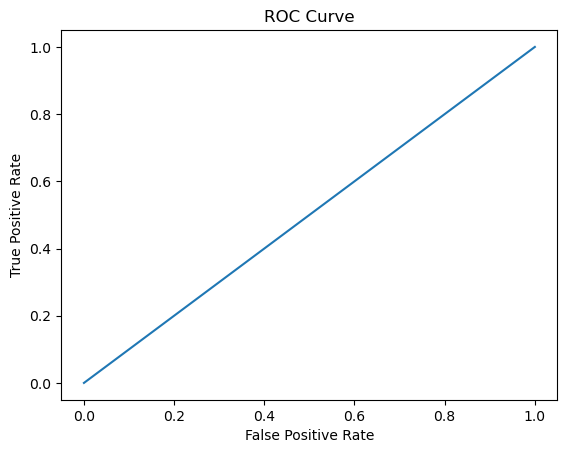

In [225]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sigmoid)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

RBF Kernel

In [226]:
# Entrenar el modelo SVM con kernel RBF y datos escalados
clf_rbf_scaled = SVC(kernel='rbf', C=0.001, gamma='scale', random_state=32)
clf_rbf_scaled.fit(X_train_scaled, y_train)

SVC(C=0.001, random_state=32)

In [227]:
# Hacer predicciones en el conjunto de prueba y calcular la precisión, el recall y la puntuación F1
y_pred_rbf = clf_rbf_scaled.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')

print('Accuracy:', accuracy_rbf*100)
print('Precision:', precision_rbf*100)
print('Recall:', recall_rbf*100)
print('F1 score:', f1_rbf*100)

Accuracy: 96.71428571428572
Precision: 48.35714285714286
Recall: 50.0
F1 score: 49.164851125635444


C:\Users\Holger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [228]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [229]:
# Read data from URL
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath, names=names, low_memory=False, sep=',')
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [230]:
# Encoding categorical variables
columnas_codificar = ['srcip', 'dstip', 'dsport', 'proto', 'state', 'dur', 'service', 'Sload', 'Dload', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'ct_ftp_cmd', 'attack_cat']
for col in columnas_codificar:
    le = LabelEncoder()
    columna_codificada = le.fit_transform(dataframe[col])
    dataframe[col] = columna_codificada

X = dataframe.iloc[:, :-1].values
scaler = StandardScaler()
x_normalised = scaler.fit_transform(X)
y = dataframe['label']

imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(x_normalised)

In [231]:
# Convert the result to a Pandas DataFrame
X = pd.DataFrame(x_imputed, columns=dataframe.columns[:-1])

y = dataframe['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)

scaler = StandardScaler()
X_train_normalised = scaler.fit_transform(X_train)
X_test_normalised = scaler.transform(X_test)

imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train_normalised)
X_test_imputed = imputer.transform(X_test_normalised)

In [232]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'random_state': [42],
}

# Grid search and cross validation
rf = RandomForestClassifier(random_state=32)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=32),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100], 'random_state': [42]})

In [233]:
# Obtain results
y_pred = rf_cv.predict(X_test_imputed)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
scores = cross_val_score(rf_cv.best_estimator_, X_train_imputed, y_train, cv=6)

# Print results
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('F1 Score:', np.mean(f1)*100)

Precision: 97.87234042553192
Recall: 100.0
F1 Score: 98.9247311827957


*ROC Curve*

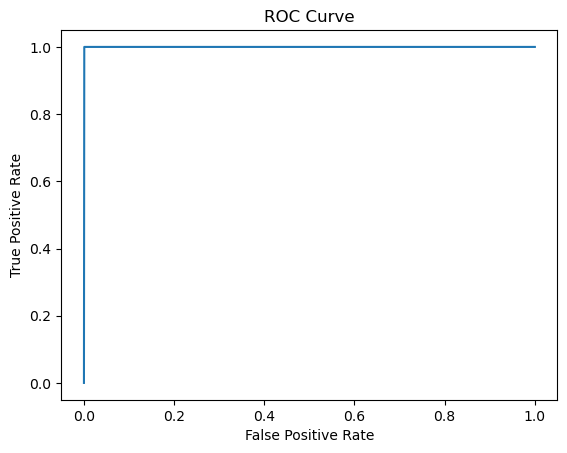

In [234]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**CNN**

In [268]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

In [269]:
datapath = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath,names=names,low_memory=False, sep=',')
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [270]:
dataframe.describe()

,sport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,3500.000000,3500.000000,3500.000000,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3.500000e+03,3.500000e+03,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,31926.315429,3.111007,3468.078571,2.876112e+04,35.811714,34.915714,5.156286,13.966857,1.862092e+06,1.346940e+06,...,0.006000,0.006000,6.182857,5.879429,5.537143,5.676286,2.883429,1.022857,2.162571,0.034857
std,19176.226410,7.019469,7187.232820,1.356012e+05,31.764679,37.409203,6.487297,47.821493,3.574078e+07,3.082352e+06,...,0.077238,0.077238,4.769418,4.503059,4.463826,4.481017,3.647220,0.175826,1.761136,0.183444
min,0.000000,0.000000,46.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15392.000000,0.010383,568.000000,3.200000e+02,31.000000,29.000000,1.000000,1.000000,5.806284e+03,8.735622e+03,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,31459.500000,0.576294,1540.000000,1.644000e+03,31.000000,29.000000,4.000000,4.000000,3.045002e+04,7.640456e+04,...,0.000000,0.000000,5.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000
75%,48528.000000,2.254592,2662.000000,1.016800e+04,31.000000,29.000000,7.000000,13.000000,5.377532e+05,6.668229e+05,...,0.000000,0.000000,9.000000,8.250000,8.000000,8.000000,3.000000,1.000000,3.000000,0.000000
max,65534.000000,50.004387,115727.000000,1.641360e+06,254.000000,252.000000,55.000000,583.000000,1.805333e+09,1.673650e+07,...,1.000000,1.000000,24.000000,23.000000,25.000000,20.000000,19.000000,4.000000,11.000000,1.000000


In [271]:
# Normalize data
columna_a_codificar = dataframe['srcip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['srcip'] = columna_codificada

columna_a_codificar = dataframe['proto']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['proto'] = columna_codificada

columna_a_codificar = dataframe['state']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['state'] = columna_codificada

columna_a_codificar = dataframe['dur']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dur'] = columna_codificada

columna_a_codificar = dataframe['service']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['service'] = columna_codificada

columna_a_codificar = dataframe['Sload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sload'] = columna_codificada

columna_a_codificar = dataframe['Dload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dload'] = columna_codificada

columna_a_codificar = dataframe['Sjit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sjit'] = columna_codificada

columna_a_codificar = dataframe['Djit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Djit'] = columna_codificada

columna_a_codificar = dataframe['Sintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sintpkt'] = columna_codificada

columna_a_codificar = dataframe['Dintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dintpkt'] = columna_codificada

columna_a_codificar = dataframe['ct_ftp_cmd']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['ct_ftp_cmd'] = columna_codificada

columna_a_codificar = dataframe['attack_cat']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['attack_cat'] = columna_codificada

In [272]:
# Split the characteristics of the dataset into a separate matrix
X = dataframe.iloc[:, :-1].values
scaler = StandardScaler()

y = dataframe['label']

X_train, X_test, y_train, y_test = train_test_split(x_normalised,
                                            y, test_size=0.4, random_state=32)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

def create_model(num_filters, kernel_size, batch_size):
    model = Sequential()
    model.add(Conv1D(filters=num_filters, input_shape=(X_train.shape[1], 1), kernel_size=kernel_size, strides=1, padding='valid'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'num_filters': [32, 64, 128],
              'kernel_size': [3, 5, 7],
              'batch_size': [32, 64, 128]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")

C:\Users\Holger\AppData\Local\Temp\ipykernel_2524\294308759.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Score: 0.9878571271896363 using {'batch_size': 32, 'kernel_size': 7, 'num_filters': 128}


In [273]:
# Create the CNN Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=32, input_shape=(X_train.shape[1], 1), kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='valid'))

# 2nd Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='valid'))

# 3rd Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=2, padding='valid'))

# 5th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# 6th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=3, strides=2, padding='valid'))

# Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(512))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# 2nd Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_850"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_880 (Conv1D)         (None, 46, 32)            128       
                                                                 
 activation_54 (Activation)  (None, 46, 32)            0         
                                                                 
 max_pooling1d_868 (MaxPooli  (None, 44, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_881 (Conv1D)         (None, 42, 32)            3104      
                                                                 
 activation_55 (Activation)  (None, 42, 32)            0         
                                                                 
 max_pooling1d_869 (MaxPooli  (None, 40, 32)           0         
 ng1D)                                              

In [274]:
# Entrenar el modelo
batch_size = 16
steps_per_epoch = (X_train.shape[0]//batch_size)
validation_steps = (x_normalised.shape[0]// batch_size)

es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=40)

model.fit(X_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 32,
    validation_data=(X_train, y_train),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/32
87/87 [==============================] - 7s 60ms/step - loss: 0.1190 - accuracy: 0.9777 - val_loss: 0.0488 - val_accuracy: 0.9729
Epoch 2/32
87/87 [==============================] - 3s 36ms/step - loss: 0.0261 - accuracy: 0.9949
Epoch 3/32
87/87 [==============================] - 5s 62ms/step - loss: 0.0271 - accuracy: 0.9978
Epoch 4/32
87/87 [==============================] - 3s 29ms/step - loss: 4.2270e-04 - accuracy: 1.0000
Epoch 5/32
87/87 [==============================] - 2s 24ms/step - loss: 3.3214e-05 - accuracy: 1.0000
Epoch 6/32
87/87 [==============================] - 2s 24ms/step - loss: 3.5015e-05 - accuracy: 1.0000
Epoch 7/32
87/87 [==============================] - 2s 25ms/step - loss: 3.3154e-06 - accuracy: 1.0000
Epoch 8/32
87/87 [==============================] - 3s 30ms/step - loss: 2.6487e-06 - accuracy: 1.0000
Epoch 9/32
87/87 [==============================] - 2s 28ms/step - loss: 3.2235e-07 - accuracy: 1.0000
Epoch 10/32
87/87 [========================

In [275]:
# Evaluates the trained model on the test data and prints the loss and accuracy as percentages
loss, accuracy = model.evaluate(X_test,y_test)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

66/66 [==============================] - 1s 12ms/step - loss: 0.0107 - accuracy: 0.9995
test_loss: 1.07
test_accuracy: 99.95


In [276]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_probs = model.predict(X_test)

model_classes = np.argmax(model_probs,axis=1)

model_probs = model_probs[:, 0]
 
accuracy = accuracy_score(y_test, model_classes)*100
precision = precision_score(y_test, model_classes, average='micro')*100
recall = recall_score(y_test, model_classes, average='micro')*100
f1 = f1_score(y_test, model_classes, average='micro')*100


# Print the results
print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

66/66 [==============================] - 1s 11ms/step
Accuracy: 96.48
F1 score: 96.48
Precision: 96.48
Recall: 96.48


*ROC Curve*

66/66 [==============================] - 1s 13ms/step


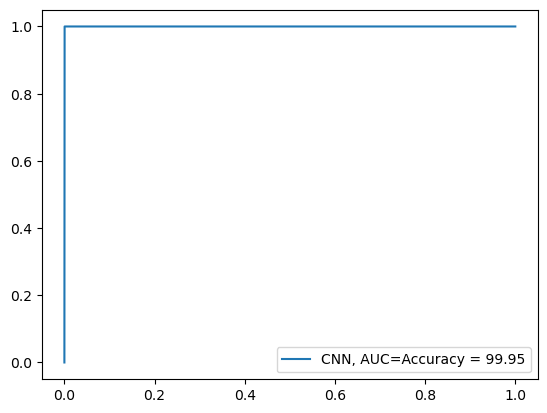

In [277]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
CNN = "Accuracy = {:.2f}".format(accuracy*100)
plt.plot(fpr, tpr, label="CNN, AUC=" + str(CNN))
plt.legend()

## Comparative Graphics

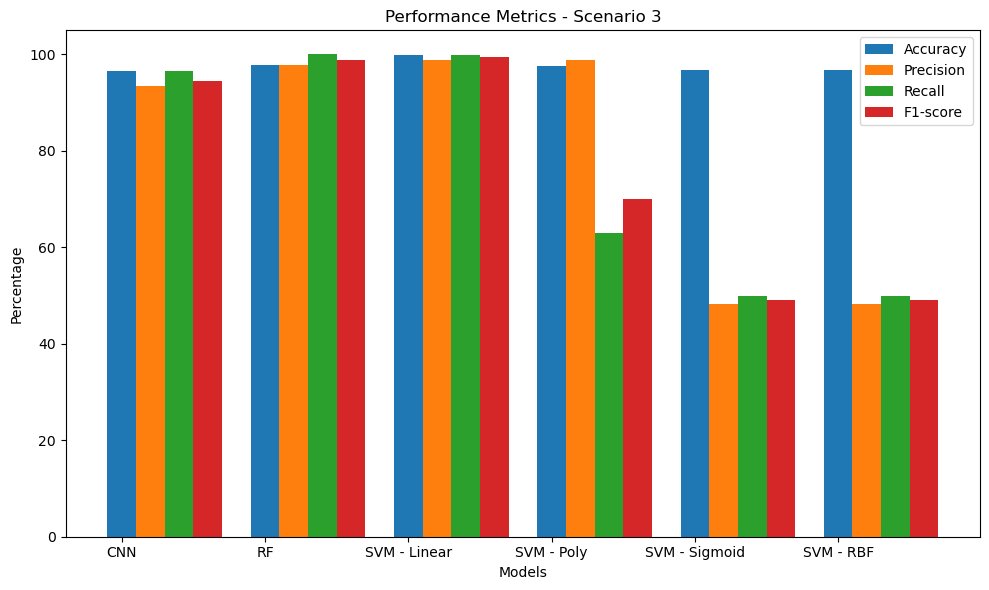

In [278]:
import matplotlib.pyplot as plt

models = ['CNN', 'RF', 'SVM - Linear', 'SVM - Poly', 'SVM - Sigmoid', 'SVM - RBF']
accuracy = [96.48, 97.87, 99.92, 97.57, 96.71, 96.71]
precision = [93.48, 97.87, 98.93, 98.77, 48.35, 48.35]
recall = [96.48, 100.00, 99.96, 63.04, 50.0, 50.00]
f1score = [94.48, 98.92, 99.44, 70.06, 49.16, 49.16]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width=0.2, align='center', label='Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, align='center', label='Precision')
plt.bar([i + 0.4 for i in x], recall, width=0.2, align='center', label='Recall')
plt.bar([i + 0.6 for i in x], f1score, width=0.2, align='center', label='F1-score')

plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Performance Metrics - Scenario 3')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()

plt.show()